In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy as sp
import warnings 
import datetime
%matplotlib inline

In [2]:
sales = pd.read_csv("C:/Users/Ronak Chopra/Downloads/supermarket_sales.csv")

In [3]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
sales.shape

(1000, 17)

In [6]:
sales.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,2.649463e+01,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431e+00,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,2.458853e+02,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,2.341765e+02,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,6.131498e-14,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580e+00,4.000000,5.500000,7.000000,8.500000,10.000000


In [7]:
sales.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


Let's find the number of unique values in columns with object datatype

In [8]:
categorical_columns = [cname for cname in sales.columns if sales[cname].dtype == "object"]

In [9]:
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Date',
 'Time',
 'Payment']

In [10]:
print("Unique values in Branch: {0}".format(len(sales['Branch'].unique().tolist())))
print("Unique values in City: {0}" .format(len(sales['City'].unique().tolist())))
print("Unique values in Customer type: {0}" .format(len(sales['Customer type'].unique().tolist())))
print("Unique values in Gender: {0}" .format(len(sales['Gender'].unique().tolist())))
print("Unique values in Product line: {0}" .format(len(sales['Product line'].unique().tolist())))
print("Unique values in Payment: {0}" .format(len(sales['Payment'].unique().tolist())))

Unique values in Branch: 3
Unique values in City: 3
Unique values in Customer type: 2
Unique values in Gender: 2
Unique values in Product line: 6
Unique values in Payment: 3


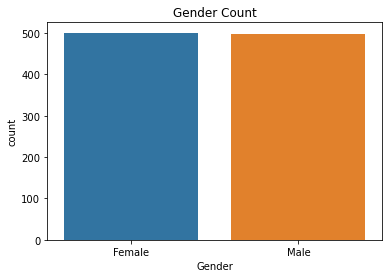

In [11]:
genderCount = sns.countplot(x = "Gender" , data = sales).set_title("Gender Count")

# Graphical representation of numerical data distribution

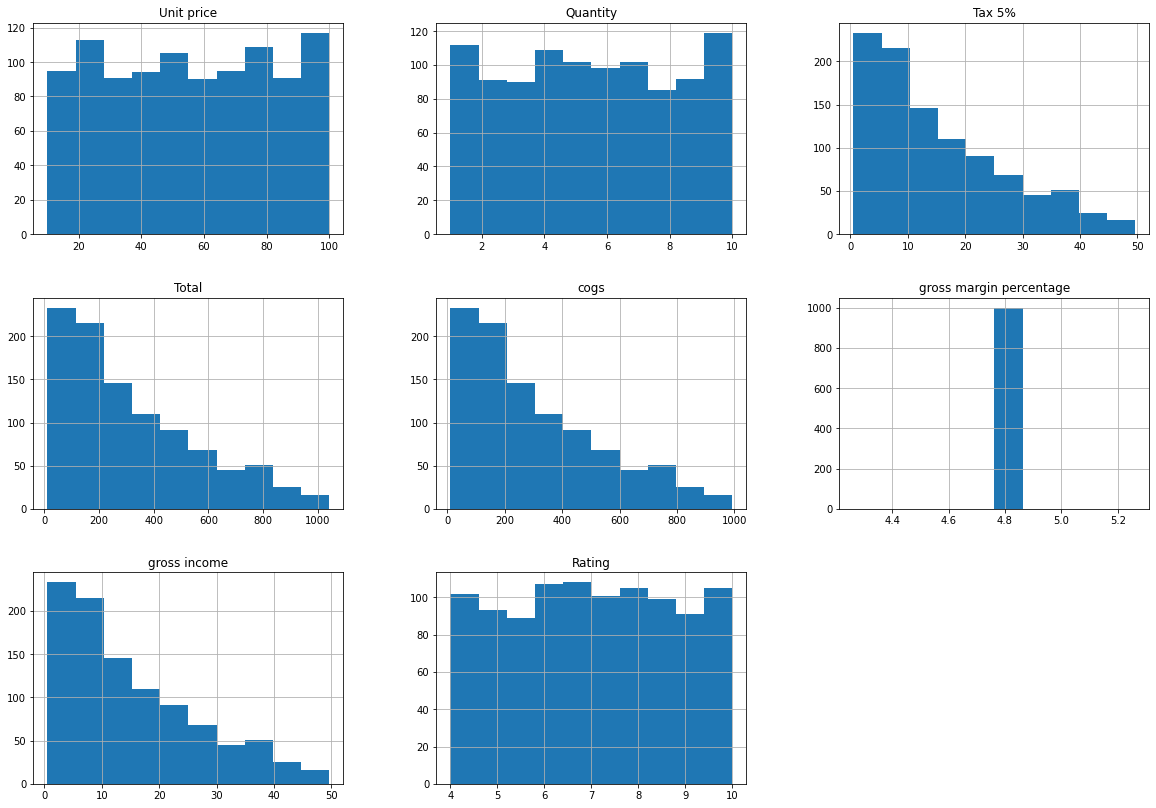

In [12]:
sales.hist(figsize = (20 , 14))
plt.show()

In [13]:
sales.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


<AxesSubplot:>

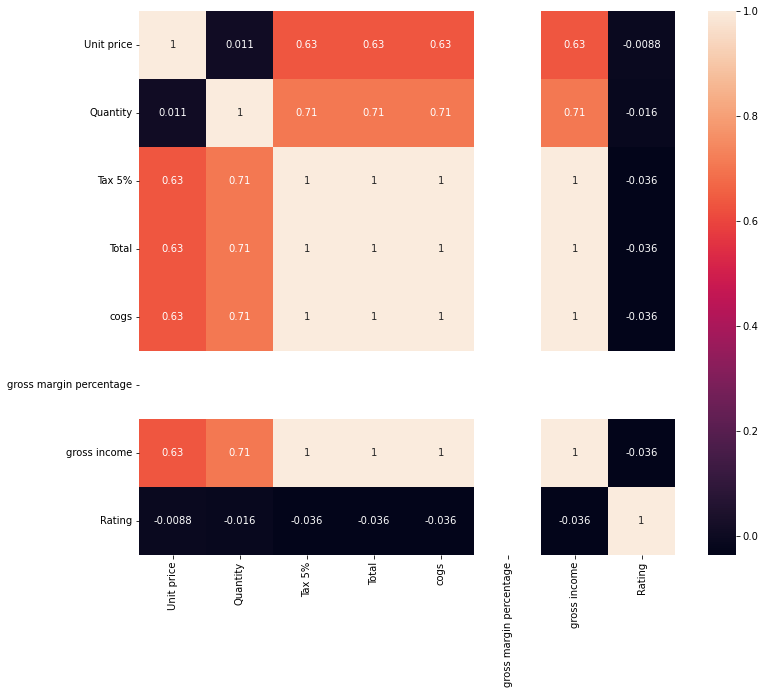

In [14]:
plt.figure(figsize = (12 , 10))
sns.heatmap(sales.corr() , annot = True)

<AxesSubplot:xlabel='gross income'>

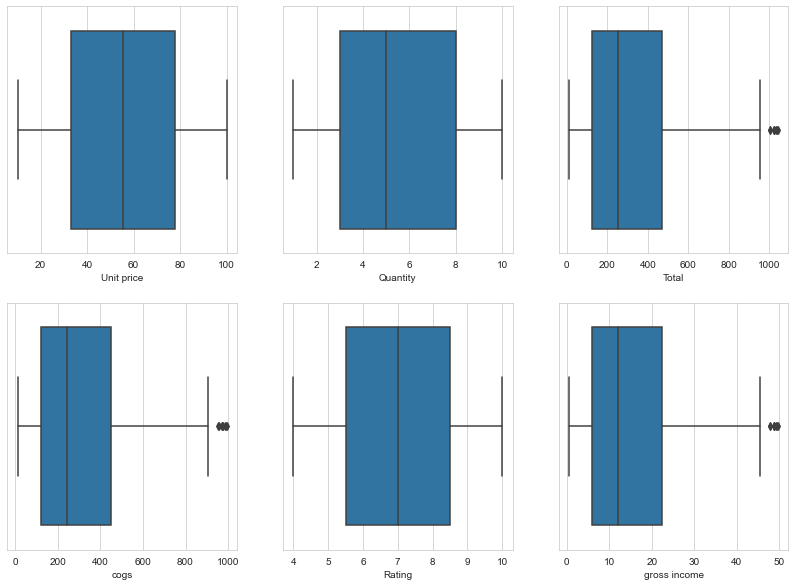

In [15]:
plt.figure(figsize = (14 , 10))
sns.set_style(style = 'whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x = 'Unit price' , data = sales)
plt.subplot(2,3,2)
sns.boxplot(x = 'Quantity' , data = sales)
plt.subplot(2,3,3)
sns.boxplot(x = 'Total' , data = sales)
plt.subplot(2,3,4)
sns.boxplot(x = 'cogs' , data = sales)
plt.subplot(2,3,5)
sns.boxplot(x = 'Rating' , data = sales)
plt.subplot(2,3,6)
sns.boxplot(x = 'gross income' , data = sales)

<AxesSubplot:xlabel='Rating', ylabel='gross income'>

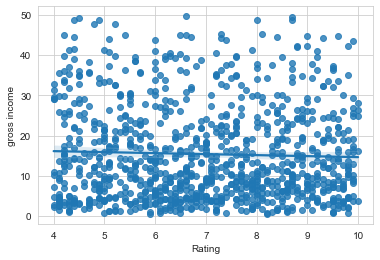

In [16]:
sns.regplot(x = 'Rating' , y = 'gross income' , data = sales)

<AxesSubplot:xlabel='Rating', ylabel='cogs'>

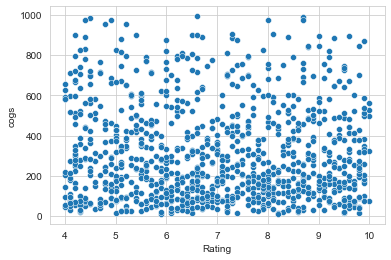

In [17]:
sns.scatterplot(x = 'Rating' , y = 'cogs', data = sales)

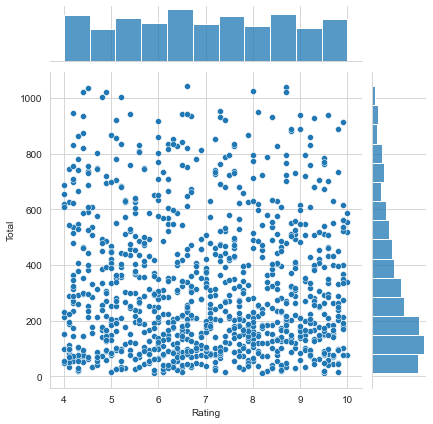

In [18]:
sns.jointplot(x = 'Rating' , y = 'Total' , data = sales)

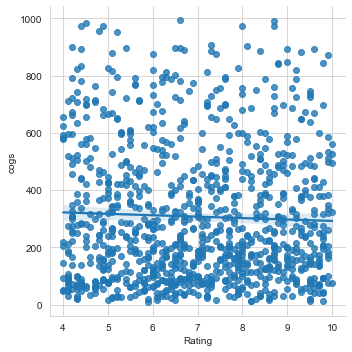

In [19]:
sns.lmplot(x='Rating', y= 'cogs', data = sales)

<AxesSubplot:xlabel='Rating', ylabel='Unit price'>

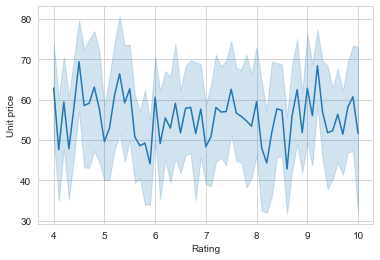

In [20]:
sns.lineplot(x='Rating', y= 'Unit price', data=sales)

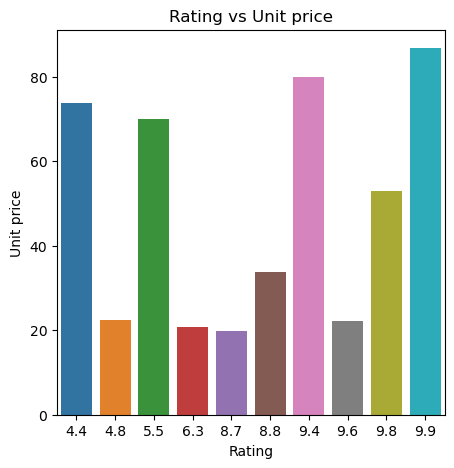

In [21]:
plt.style.use("default")
plt.figure(figsize = (5,5))
sns.barplot(x = "Rating" , y = "Unit price" , data = sales[170:180])
plt.title("Rating vs Unit price")
plt.xlabel("Rating")
plt.ylabel("Unit price")
plt.show()

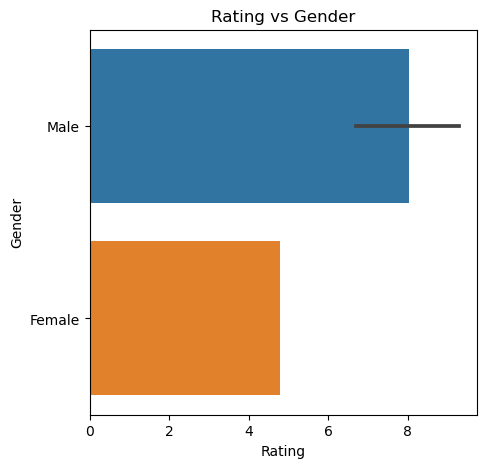

In [22]:
plt.style.use("default")
plt.figure(figsize = (5,5))
sns.barplot(x = "Rating" , y = "Gender" , data = sales[170:180])
plt.title("Rating vs Gender")
plt.xlabel("Rating")
plt.ylabel("Gender")
plt.show()

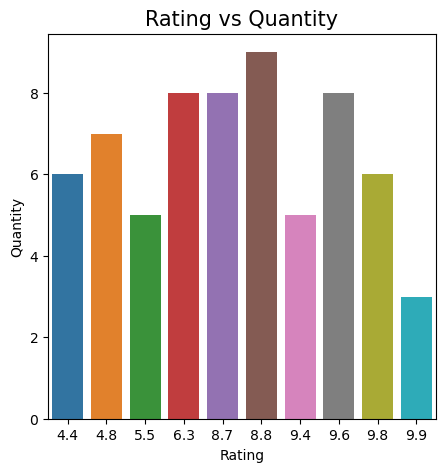

In [23]:
plt.style.use("default")
plt.figure(figsize = (5,5))
sns.barplot(x = "Rating", y = "Quantity", data = sales[170:180])
plt.title("Rating vs Quantity",fontsize = 15)
plt.xlabel("Rating")
plt.ylabel("Quantity")
plt.show()

# Finding the categorial features

In [24]:
list_1 = list(sales.columns)

In [25]:
list_cate=[]  # A categorical list only array
for i in list_1:
    if sales[i].dtype=='object':
        list_cate.append(i)

In [26]:
#LabelEncoder is a utility class to help normalize labels such that they contain only values between 0 and n_classes-1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [27]:
for i in list_cate:
    sales[i] = le.fit_transform(sales[i])

In [28]:
sales

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,814,0,2,0,0,3,74.69,7,26.1415,548.9715,26,146,2,522.83,4.761905,26.1415,9.1
1,142,2,1,1,0,0,15.28,5,3.8200,80.2200,87,23,0,76.40,4.761905,3.8200,9.6
2,653,0,2,1,1,4,46.33,7,16.2155,340.5255,81,155,1,324.31,4.761905,16.2155,7.4
3,18,0,2,0,1,3,58.22,8,23.2880,489.0480,19,485,2,465.76,4.761905,23.2880,8.4
4,339,0,2,1,1,5,86.31,7,30.2085,634.3785,57,29,2,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,153,2,1,1,1,3,40.35,1,2.0175,42.3675,21,174,2,40.35,4.761905,2.0175,6.2
996,250,1,0,1,0,4,97.38,10,48.6900,1022.4900,70,342,2,973.80,4.761905,48.6900,4.4
997,767,0,2,0,1,2,31.84,1,1.5920,33.4320,58,154,0,31.84,4.761905,1.5920,7.7
998,308,0,2,1,1,4,65.82,1,3.2910,69.1110,45,261,0,65.82,4.761905,3.2910,4.1


In [29]:
y = sales['Gender']
x = sales.drop(['Gender'] , axis = 1)
x.head(10)

,Invoice ID,Branch,City,Customer type,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,814,0,2,0,3,74.69,7,26.1415,548.9715,26,146,2,522.83,4.761905,26.1415,9.1
1,142,2,1,1,0,15.28,5,3.8200,80.2200,87,23,0,76.40,4.761905,3.8200,9.6
2,653,0,2,1,4,46.33,7,16.2155,340.5255,81,155,1,324.31,4.761905,16.2155,7.4
3,18,0,2,0,3,58.22,8,23.2880,489.0480,19,485,2,465.76,4.761905,23.2880,8.4
4,339,0,2,1,5,86.31,7,30.2085,634.3785,57,29,2,604.17,4.761905,30.2085,5.3
5,733,2,1,1,0,85.39,7,29.8865,627.6165,76,393,2,597.73,4.761905,29.8865,4.1
6,315,0,2,0,0,68.84,6,20.6520,433.6920,48,214,2,413.04,4.761905,20.6520,5.8
7,264,2,1,1,4,73.56,10,36.7800,772.3800,47,77,2,735.60,4.761905,36.7800,8.0
8,702,0,2,0,3,36.26,2,3.6260,76.1460,1,341,1,72.52,4.761905,3.6260,7.2
9,726,1,0,0,2,54.84,3,8.2260,172.7460,43,159,1,164.52,4.761905,8.2260,5.9


# TRAINING AND TESTING DATA

In [30]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , random_state = 0, test_size = 0.2)

In [31]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

800
200
800
200


# MODELS FITTING

# DECISION TREE CLASSIFIER

In [32]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')
dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

In [33]:
y_pred = dtree.predict(x_test)
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n" , classification_report(y_test , y_pred))
print("Confusion Matrix:\n" , confusion_matrix(y_test,y_pred))
print("Training Score:\n" , dtree.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.52      0.79      0.63       100
           1       0.56      0.27      0.36       100

    accuracy                           0.53       200
   macro avg       0.54      0.53      0.50       200
weighted avg       0.54      0.53      0.50       200

Confusion Matrix:
 [[79 21]
 [73 27]]
Training Score:
 63.87500000000001


# RANDOM FOREST CLASSIFIER

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train , y_train)

RandomForestClassifier()

In [35]:
y_pred = rfc.predict(x_test)
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n" , classification_report(y_test,y_pred))
print("Confusion Matrix:\n" , confusion_matrix(y_test,y_pred))
print("Training Score:\n" , rfc.score(x_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.51      0.55      0.53       100
           1       0.52      0.48      0.50       100

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.51       200
weighted avg       0.52      0.52      0.51       200

Confusion Matrix:
 [[55 45]
 [52 48]]
Training Score:
 100.0


One thing to observe is when OUTLET_TYPE = supermarket type 1 and OUTLET_LOCATION_TYPE is Tier 2 then outlet size is null furthermore when OUTLET_TYPE = Grocery store and OUTLET_LOCATION_TYPE is Tier 3 then outlet size is always null